<a href="https://colab.research.google.com/github/athospugliesedev/python_codes/blob/main/Classificacao_ArvoreDecisao_Atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>
<h align=left><font size = 6, style="color:rgb(200,0,0)">Árvore de Decisão - Atividade IRis</font></h>
<hr>

[mais info Click](https://www.sakurai.dev.br/classificacao-iris/)

**Decision Tree** <br>

A Árvore de Decisão (Decision Tree) é um modelo que cria uma estrutura de árvore com a representação das possíveis decisões que podem ser tomadas permitindo separar as classes de dados de acordo com suas características.

**Como podemos classificar uma flor?** <br>
O dataset de Iris é clássico e muito utilizado para ensinar como funciona modelos de classificação. A partir das caracteristicas da flor Iris, o objetivo é classificar (definir a classe / rótulo) de qual é o tipo dessa flor, entre três tipos possíveis: Versicolor, Setosa e Virginica.

<img src='https://www.sakurai.dev.br/assets/images/posts/2018-10-17-classificacao-iris-01.png'>

Este dataset é composto por cinco características: SepalLength (Comprimento da Sépala), SepalWidth (Largura da Sépala), PetalLength (Comprimento da Pétala), PetalWidth (Largura da Pétala) e class (Classe).

<img src="https://www.sakurai.dev.br/assets/images/posts/2018-10-17-classificacao-iris-03.png">

# Importando as bibliotecas

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

#plotly or other graphing library
import plotly.express as px


# Importando os dados

In [22]:
address = 'https://github.com/tuliofor/dados_aula/raw/main/iris.csv'
df = pd.read_csv(address, sep=',')

In [23]:
df.sample(2)

,sepal_length,sepal_width,petal_length,petal_width,species
126,6.2,2.8,4.8,1.8,virginica
146,6.3,2.5,5.0,1.9,virginica


# Pré-visualização dos dados

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Preparação e transformação dos dados

**Lembrando**, é preciso transformar as variveis categoricas em numericas para o funcioanmento dos modelos de aprendizado de máquina

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_species = label_encoder.fit_transform(df.species)
labels_species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
df['target'] = labels_species
df['target'].unique()

array([0, 1, 2])

In [27]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [28]:
y = df["species"].values

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values


# Identificando as variaveis  (x, y)

In [29]:
X.shape

(150, 4)

In [30]:
y.shape

(150,)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(105, 4)
(105,)
(45, 4)
(45,)


# Dividindo a base de dados (treino e teste)

In [ ]:
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_train_scaled


In [32]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_test)

X_test_scaled = X_scaler.transform(X_test)
X_test_scaled


array([[ 1.15880315e+00,  6.61722223e-02,  7.63269830e-01,
         1.43174515e+00],
       [ 8.73070868e-02, -1.81973611e-01,  5.91534118e-01,
         7.82263984e-01],
       [ 5.63527560e-01, -6.78265278e-01,  1.04949602e+00,
         1.17195268e+00],
       [ 1.75407874e+00, -6.78265278e-01,  1.33572220e+00,
         9.12160218e-01],
       [ 8.01637797e-01, -4.30119445e-01,  4.77043644e-01,
         1.32782816e-01],
       [-1.10324410e+00,  3.14318056e-01, -1.46929442e+00,
        -1.29607575e+00],
       [ 9.20692915e-01,  6.61722223e-02,  3.62553169e-01,
         2.62679050e-01],
       [-6.27023623e-01,  1.55504722e+00, -1.29755871e+00,
        -1.29607575e+00],
       [-1.22229922e+00,  6.61722223e-02, -1.29755871e+00,
        -1.42597199e+00],
       [ 1.15880315e+00,  6.61722223e-02,  6.48779355e-01,
         3.92575283e-01],
       [-5.07968505e-01,  1.05875556e+00, -1.41204919e+00,
        -1.29607575e+00],
       [ 9.20692915e-01,  5.62463889e-01,  1.10674125e+00,
      

# Selecionando o modelo

In [33]:
knn = KNN(n_neighbors=5)

knn

KNeighborsClassifier()

In [34]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [35]:
y_pred = knn.predict(X_test)


In [36]:
print("Predictions: {}".format(y_pred))

Predictions: ['virginica' 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'setosa' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor']


In [37]:
knn.score(X_test, y_test)


0.9777777777777777

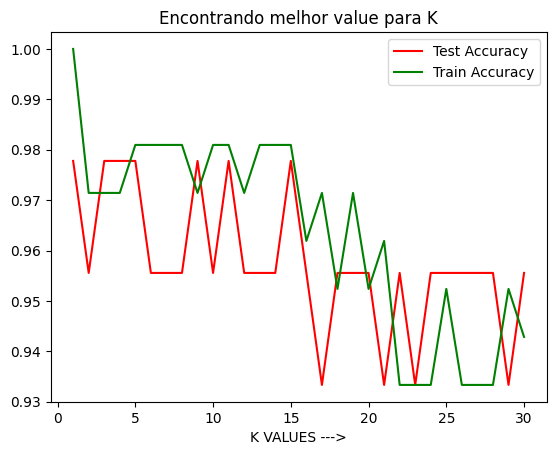

In [40]:
p = list(range(1, 31))
lst_test =[]
lst_train =[]
for i in p:
    knn = KNN(n_neighbors = i)
    knn.fit(X_train, y_train)
    z = knn.score(X_test, y_test)
    t = knn.score(X_train, y_train)
    lst_test.append(z)
    lst_train.append(t)

plt.plot(p, lst_test, color ='red', label ='Test Accuracy')
plt.plot(p, lst_train, color ='green', label ='Train Accuracy')
plt.xlabel('K VALUES --->')
plt.title('Encontrando melhor value para K')
plt.legend()